In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

/Users/tqh7876/Library/CloudStorage/OneDrive-Takeda/ActiveProjects/WearableSimulations/code/quantitative-sciences-nt1-detection-wearable-simulation


In [ ]:
def CM_prevalence_adjusted(tn, fp, fn, tp, target_prevalence):
    # you only have to adjust one group relative to the other

    # Normalize prevalence
    current_prevalence = (fn + tp) / (tn + fp)
    
    # cases
    tp_norm = tp / current_prevalence
    fn_norm = fn / current_prevalence

    # adjust to target prevalence
    tp_target = tp_norm * target_prevalence
    fn_target = fn_norm * target_prevalence

    return tn, fp, fn_target, tp_target

def compute_metrics(tn, fp, fn, tp):

    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else np.nan
    specificity = tn / (tn + fp) if (tn + fp) > 0 else np.nan
    ppv = tp / (tp + fp) if (tp + fp) > 0 else np.nan
    fp_tp_ratio = fp / tp if tp > 0 else np.inf
    f1 = 2 * (ppv * sensitivity) / (ppv + sensitivity) if (ppv + sensitivity) > 0 else np.nan
    
    return {'Sensitivity': sensitivity, 'Specificity': specificity, 'PPV': ppv, 'FP:TP': fp_tp_ratio, 'F1 score': f1}

In [4]:
results = [
    {'name': 'Multi-feature', 'performance': {'tn': 4823, 'fp': 63, 'fn': 49, 'tp': 92}},
    {'name': 'SOREMPs', 'performance': {'tn': 4805, 'fp': 81, 'fn': 56, 'tp': 85}}
]

prevalences = {'1:1': 1, '1:8': 1/8, '1:32': 1/32, '1:128': 1/128, '1:512': 1/512, '1:2048': 1/2048}

out = []
for result in results:
    for prev_label, prevalence in prevalences.items():

        # compute prevalence adjusted performance
        tn, fp, fn, tp = CM_prevalence_adjusted(**result['performance'], target_prevalence=prevalence)
        metrics = compute_metrics(tn, fp, fn, tp)


        out.append({
            'name': result['name'],
            'Prevalence': prev_label, 
            'prevalence_numbers': prevalence, 
            **metrics
        })

df_results = pd.DataFrame(out)

df_results.head(20)

,name,Prevalence,prevalence_numbers,Sensitivity,Specificity,PPV,FP:TP,F1 score
0,Multi-feature,1:1,1.000000,0.652482,0.987106,0.980622,0.019761,0.783585
1,Multi-feature,1:8,0.125000,0.652482,0.987106,0.863490,0.158091,0.743301
2,Multi-feature,1:32,0.031250,0.652482,0.987106,0.612608,0.632366,0.631917
3,Multi-feature,1:128,0.007812,0.652482,0.987106,0.283329,2.529463,0.395095
4,Multi-feature,1:512,0.001953,0.652482,0.987106,0.089945,10.117852,0.158097
5,Multi-feature,1:2048,0.000488,0.652482,0.987106,0.024113,40.471409,0.046507
6,SOREMPs,1:1,1.000000,0.602837,0.983422,0.973236,0.027500,0.744512
7,SOREMPs,1:8,0.125000,0.602837,0.983422,0.819672,0.220000,0.694728
8,SOREMPs,1:32,0.031250,0.602837,0.983422,0.531915,0.879998,0.565160
9,SOREMPs,1:128,0.007812,0.602837,0.983422,0.221239,3.519992,0.323687


/var/folders/m_/cv6d9d7j7jbglrv6xhynzvrh0000gr/T/ipykernel_28825/3536426818.py:19: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0, ha='center')


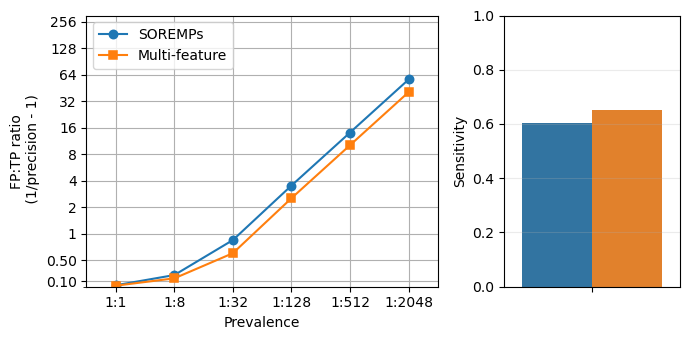

In [ ]:
# parameters
epsilon = 1e-5
names = ['SOREMPs', 'Multi-feature']

# plot
fig, ax = plt.subplots(ncols=2, figsize=(7, 3.5), gridspec_kw={'width_ratios': [2, 1]})
sns.pointplot(
    df_results,
    x='Prevalence', 
    y='FP:TP', 
    hue='name', hue_order=names,
    markers=['o', 's', 'v', 'd', 'x'], ms=6,
    lw=1.5,
    ax=ax[0]
)

# Configurations
ax[0].set_ylabel('FP:TP ratio\n (1/precision - 1)')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=0, ha='center')

# Set y-axis to log scale
#ax.set_yscale('symlog', base=2, linthresh=1e-2)  # Log scale with linear threshold near zero
ax[0].set_yscale('symlog', base=2, linthresh=1)  # Log scale with linear threshold near zero
ax[0].set_ylim([0, 300])

# Customize y-tick labels to actual values
ticks = [epsilon, 0.1, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256]
ticks = [0.1, 0.5, 1, 2, 4, 8, 16, 32, 64, 128, 256]
ax[0].set_yticks(ticks)
ax[0].set_yticklabels([f'{tick:.2f}' if tick < 1 else f'{tick}' for tick in ticks])  # Format values for readability

# final
ax[0].grid()
ax[0].legend(title='', loc='upper left')

ax[1].grid(alpha=0.25)

sns.barplot(df_results, hue='name', hue_order=names, y='Sensitivity', ax=ax[1])
ax[1].set_ylim(0, 1)
# ax[1].legend(title='')
ax[1].legend().remove()

plt.tight_layout()